In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import model_selection
from mlxtend.plotting import plot_learning_curves
from sklearn.linear_model import LinearRegression
from mlxtend.plotting import plot_learning_curves
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor

In [127]:
#Creating Dataframe
wrongcars=pd.read_csv('imports-85.data')

In [128]:
#Checking names of columns
wrongcars.head

<bound method NDFrame.head of      3    ?  alfa-romero     gas    std   two  ...  9.00  111  5000  21  27  13495
0    3    ?  alfa-romero     gas    std   two  ...   9.0  111  5000  21  27  16500
1    1    ?  alfa-romero     gas    std   two  ...   9.0  154  5000  19  26  16500
2    2  164         audi     gas    std  four  ...  10.0  102  5500  24  30  13950
3    2  164         audi     gas    std  four  ...   8.0  115  5500  18  22  17450
4    2    ?         audi     gas    std   two  ...   8.5  110  5500  19  25  15250
..  ..  ...          ...     ...    ...   ...  ...   ...  ...   ...  ..  ..    ...
199 -1   95        volvo     gas    std  four  ...   9.5  114  5400  23  28  16845
200 -1   95        volvo     gas  turbo  four  ...   8.7  160  5300  19  25  19045
201 -1   95        volvo     gas    std  four  ...   8.8  134  5500  18  23  21485
202 -1   95        volvo  diesel  turbo  four  ...  23.0  106  4800  26  27  22470
203 -1   95        volvo     gas  turbo  four  ...   9.5 

In [129]:
#Note: The original labels were a row that got treated as a column label by pandas, it's fine that it was replaced by the
#proper labels since the that row had missing values anyways.
#Properly labelling columns
names=["symboling","normalized-losse","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels",
       "engine-location","wheel-base","length","width",
       "height","curb-weight","engine-type","num-of-cylinders",
       "engine-size","fuel-system","bore","stroke","compression-ratio",
       "horsepower","peak-rpm","city-mpg","highway-mpg","price"]
wrongcars.columns=names

In [130]:
#Checking database after identification
wrongcars

,symboling,normalized-losse,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [131]:
#Identifying and removing missing values
wrongcars=wrongcars.replace(to_replace ="?",value =np.nan) 
wrongcars=wrongcars.dropna()
#Checking for success
wrongcars

,symboling,normalized-losse,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [132]:
#WARNING: ONLY RUN THIS CELL ONCE, RUNNING IT AGAIN WITHOUT RESETTING THE DATAFRAME RUINS ALL THE VALUES
#Discretizing values:
make={'alfa-romero':0, 'audi':1, 'bmw':2, 'chevrolet':3, 'dodge':4, 'honda':5,
'isuzu':6, 'jaguar':7, 'mazda':8, 'mercedes-benz':9, 'mercury':10,
'mitsubishi':11, 'nissan':12, 'peugot':13, 'plymouth':14, 'porsche':15,
'renault':16, 'saab':17, 'subaru':18, 'toyota':19, 'volkswagen':20, 'volvo':21}
wrongcars['make']=wrongcars['make'].map(make)
F_T={'gas':0,'diesel':1}
wrongcars['fuel-type']=wrongcars['fuel-type'].map(F_T)
A={'std':0,'turbo':1}
wrongcars['aspiration']=wrongcars['aspiration'].map(A)
Doors={'four':0,'two':1}
wrongcars['num-of-doors']=wrongcars['num-of-doors'].map(Doors)
B_S={'hardtop':0, 'wagon':1, 'sedan':2, 'hatchback':3, 'convertible':4}
wrongcars['body-style']=wrongcars['body-style'].map(B_S)
D_W={'4wd':0,'fwd':1,'rwd':2}
wrongcars['drive-wheels']=wrongcars['drive-wheels'].map(D_W)
E_L={'front':0,'rear':1}
wrongcars['engine-location']=wrongcars['engine-location'].map(E_L)
E_T={'dohc':0, 'dohcv':1, 'l':2, 'ohc':3, 'ohcf':4, 'ohcv':5, 'rotor':6}
wrongcars['engine-type']=wrongcars['engine-type'].map(E_T)
N_C={'eight':0, 'five':1, 'four':2, 'six':3, 'three':4, 'twelve':5, 'two':6}
wrongcars['num-of-cylinders']=wrongcars['num-of-cylinders'].map(N_C)
F_S={ '1bbl':0, '2bbl':1, '4bbl':2, 'idi':3, 'mfi':4, 'mpfi':5, 'spdi':6, 'spfi':7}
wrongcars['fuel-system']=wrongcars['fuel-system'].map(F_S)

In [133]:
wrongcars

,symboling,normalized-losse,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
2,2,164,1,0,0,0,2,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,1,0,0,0,2,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115,5500,18,22,17450
5,1,158,1,0,0,0,2,1,0,105.8,192.7,71.4,55.7,2844,3,1,136,5,3.19,3.40,8.5,110,5500,19,25,17710
7,1,158,1,0,1,0,2,1,0,105.8,192.7,71.4,55.9,3086,3,1,131,5,3.13,3.40,8.3,140,5500,17,20,23875
9,2,192,2,0,0,1,2,2,0,101.2,176.8,64.8,54.3,2395,3,2,108,5,3.50,2.80,8.8,101,5800,23,29,16430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,21,0,0,0,2,2,0,109.1,188.8,68.9,55.5,2952,3,2,141,5,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,21,0,1,0,2,2,0,109.1,188.8,68.8,55.5,3049,3,2,141,5,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,21,0,0,0,2,2,0,109.1,188.8,68.9,55.5,3012,5,3,173,5,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,21,1,1,0,2,2,0,109.1,188.8,68.9,55.5,3217,3,3,145,3,3.01,3.40,23.0,106,4800,26,27,22470


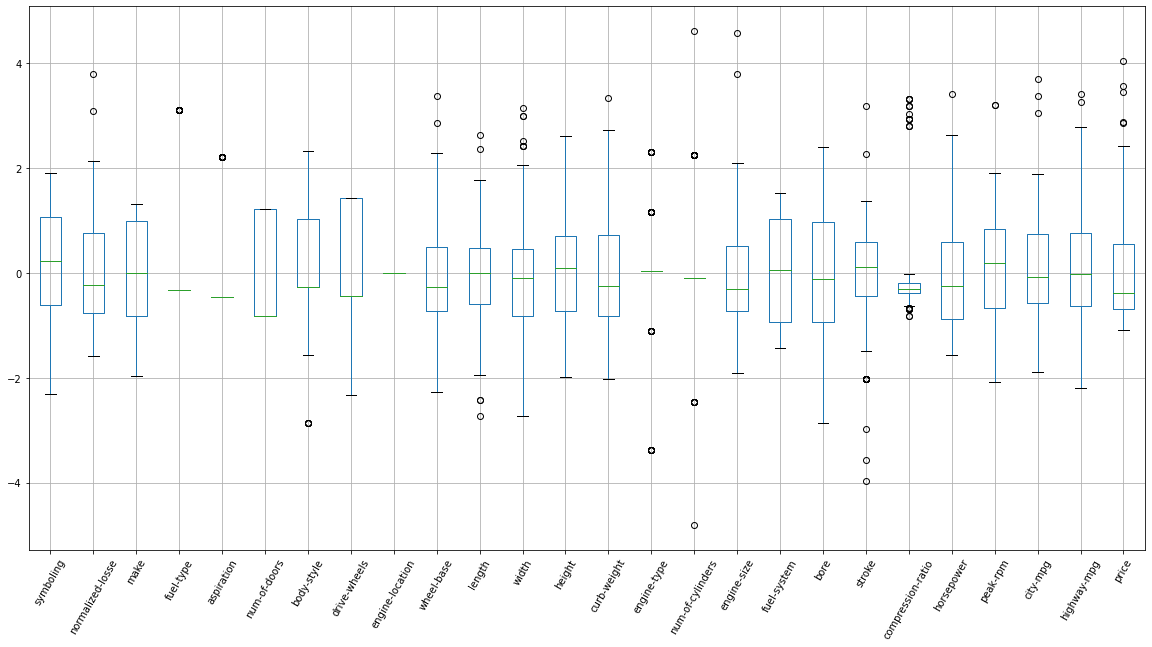

In [134]:
# Distribution & Description Of Outliers  
from sklearn.preprocessing import scale #Centre to the mean then divide by the Std. dev. 
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
scaled_X = pd.DataFrame(scale(X), columns=X.columns)
scaled_X.boxplot(ax=ax, rot=60)
plt.show()

In [135]:
#Train test split stuff
X=wrongcars
X.drop(columns='price',axis=1)
Y=wrongcars['price']
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.05,random_state=42)

In [136]:
#Using linear regression:
reg = LinearRegression()
reg.fit(X, Y)
Y_pred=reg.predict(X_test)
#Accuracy of prediction:
#Using r2 score
print('Coefficient of determination: {}'.format (metrics.r2_score(Y_test, Y_pred)))
#1.00, A perfect prediction? Very suspicious

Coefficient of determination: 1.0


In [145]:
#Using rmse
metrics.mean_squared_error(Y_test, Y_pred, squared=False)

4.51323859153472e-12

In [146]:
#Using MSE
metrics.mean_squared_error(Y_test, Y_pred, squared=True)

2.0369322584118306e-23

In [144]:
# Bias & Variance
Y_mean_test =Y_test.mean() 
Y_mean_pred =Y_pred.mean()
bias = Y_mean_test - Y_mean_pred
print(round(bias,3))

variance = np.var(Y_test.astype(int))-np.var(Y_pred.astype(int))
variance

1.6500238074987124e+34


-1132.703125

ValueError: ignored

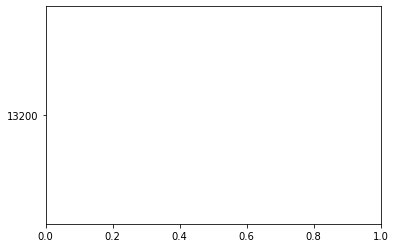

In [41]:
#Visualization of random forest regressor
plt.scatter(X_test, Y_test,  color='red')
plt.plot(X_test, Y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [120]:
#Using Random Forest:
RFR=RandomForestRegressor(max_depth=None, random_state=0)
RFR.fit(X,Y)
RFR_Y_pred=RFR.predict(X_test)
#I'm using r2_score because accuracy_score gives an error, so does the innate score function in RFR
metrics.r2_score(Y_test,RFR_Y_pred)
#0.99, a 99% accurate prediction
#Probably not all that trustworthy

0.9997550527778319

In [44]:
#An attempt at visualizing the random forest regressor learning curve 
plot_learning_curves(X_train, Y_train, X_test, Y_test, wrongcars)
plt.show()

AttributeError: ignored

In [119]:
#RMSE
metrics.mean_squared_error(Y_test, RFR_Y_pred, squared=False)
#62%, a more reasonable score

62.017751087893586

In [121]:
#MSE
metrics.mean_squared_error(Y_test, RFR_Y_pred, squared=True)

3846.201449999926

In [117]:
#Using innate score function of RFR (also gives an error)
#Used reshape, didn't work.
#RFR_Y_pred=RFR_Y_pred.reshape(-1,1)
RFR.score(Y_test,RFR_Y_pred)

ValueError: ignored

In [113]:
#Using SGD Regressor
SGD=SGDRegressor().fit(X,Y)
SGD_Y_pred=RFR.predict(X_test)
#I'm using r2_score because accuracy_score gives an error, so does the innate score function in SGD
metrics.r2_score(Y_test,SGD_Y_pred)

0.9997550527778319

In [122]:
#Using rmse
metrics.mean_squared_error(Y_test, SGD_Y_pred, squared=False)

62.017751087893586

In [123]:
#Using MSE
metrics.mean_squared_error(Y_test, SGD_Y_pred, squared=True)

3846.201449999926